In [1]:
import os
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions')

In [3]:
df = pd.read_csv('results/washington.jun20-jul22.subsampled.ko.meta.tsv',sep='\t')
ref = SeqIO.read('sars2_ref.gb','gb')

## QC

In [4]:
df.columns

Index(['strain', 'Ns', 'gaps', 'ORF1a_deletions', 'ORF1a_gaps',
       'ORF1a_nDeleted', 'ORF1a_maxDeletion', 'ORF1a_maxGap',
       'ORF1a_frameShifts', 'ORF1a_proteinLength',
       ...
       'QC_frame_shifts', 'QC_stop_codons', 'QC_overall_score',
       'QC_overall_status', 'frame_shifts', 'deletions', 'insertions',
       'substitutions', 'aaSubstitutions', 'clock_deviation'],
      dtype='object', length=177)

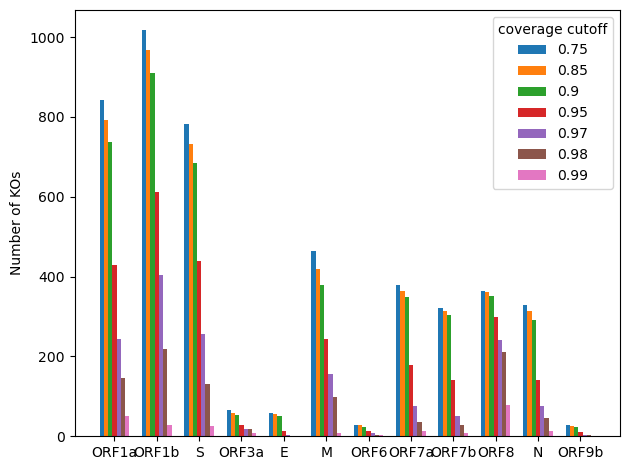

In [5]:
fig, ax = plt.subplots(tight_layout=True)
cutoffs = [0.75,0.85,0.9,0.95,0.97,0.98,0.99]
for cutoff,w in zip(cutoffs, np.arange(0,len(cutoffs)*0.1,0.1)):
    genes = []
    kos = []
    lengths = []
    filt = df[df.coverage>cutoff]
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            ko = filt[name+'_ko']
            genes.append(name)
            kos.append(len(ko[ko=='Yes']))
            lengths.append(length)
    locs = np.arange(0,len(genes))
    ax.bar(locs+w,kos,0.1,label=cutoff)
ax.set_ylabel('Number of KOs')
ax.set_xticks(locs+w/2,genes)
ax.legend(title='coverage cutoff')

In [6]:
df.missing_data.unique()

array([1059,   30,    0, ...,  286, 2479, 2688])

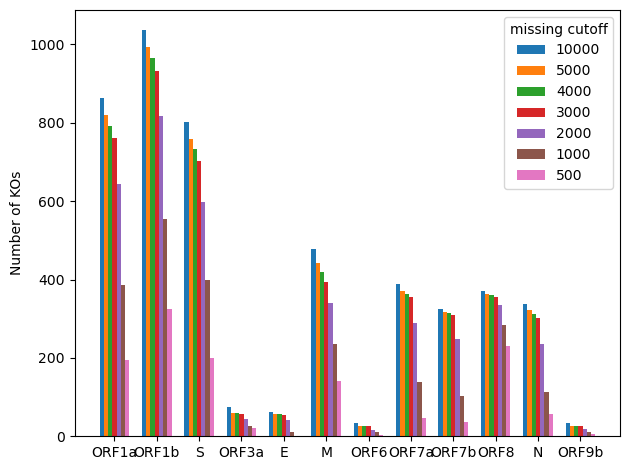

In [7]:
fig, ax = plt.subplots(tight_layout=True)
cutoffs = [10000,5000,4000,3000,2000,1000,500]
for cutoff,w in zip(cutoffs, np.arange(0,len(cutoffs)*0.1,0.1)):
    genes = []
    kos = []
    lengths = []
    filt = df[df.missing_data<cutoff]
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            ko = filt[name+'_ko']
            genes.append(name)
            kos.append(len(ko[ko=='Yes']))
            lengths.append(length)
    locs = np.arange(0,len(genes))
    ax.bar(locs+w,kos,0.1,label=cutoff)
ax.set_ylabel('Number of KOs')
ax.set_xticks(locs+w/2,genes)
ax.legend(title='missing cutoff')

In [8]:
df.QC_missing_data.unique()

array(['good', 'bad', 'mediocre'], dtype=object)

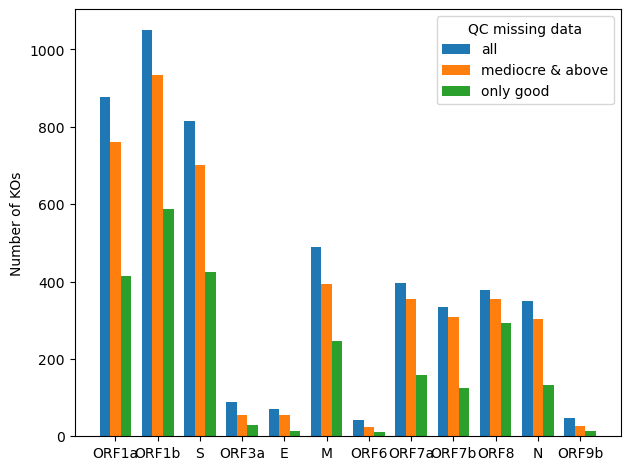

In [9]:
fig, ax = plt.subplots(tight_layout=True)
cutoffs = ['all','bad','mediocre']
bads = []
for cutoff,w,lab in zip(cutoffs, np.arange(0,len(cutoffs)*0.25,0.25),['all','mediocre & above','only good']):
    bads.append(cutoff)
    genes = []
    kos = []
    lengths = []
    filt = df[~df.QC_missing_data.isin(bads)]
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            ko = filt[name+'_ko']
            genes.append(name)
            kos.append(len(ko[ko=='Yes']))
            lengths.append(length)
    locs = np.arange(0,len(genes))
    ax.bar(locs+w,kos,0.25,label=lab)
ax.set_ylabel('Number of KOs')
ax.set_xticks(locs+w/2,genes)
ax.legend(title='QC missing data')
fig.savefig('figs/qcmissing_ko.pdf',dpi=300,bbox_inches='tight')

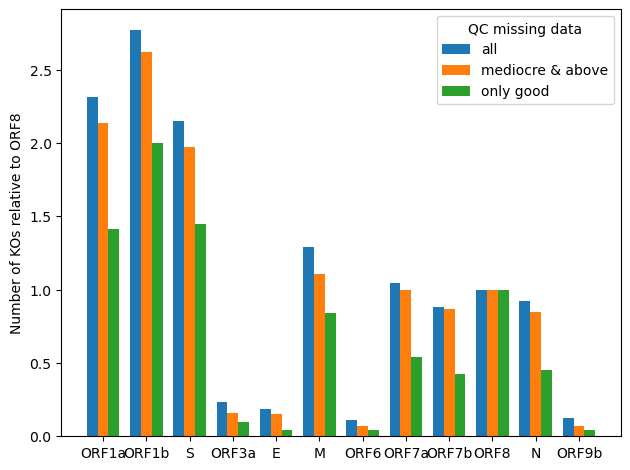

In [10]:
fig, ax = plt.subplots(tight_layout=True)
cutoffs = ['all','bad','mediocre']
bads = []
for cutoff,w,lab in zip(cutoffs, np.arange(0,len(cutoffs)*0.25,0.25),['all','mediocre & above','only good']):
    bads.append(cutoff)
    genes = []
    kos = []
    lengths = []
    filt = df[~df.QC_missing_data.isin(bads)]
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            ko = filt[name+'_ko']
            genes.append(name)
            kos.append(len(ko[ko=='Yes']))
            lengths.append(length)
    locs = np.arange(0,len(genes))
    heights = np.asarray(kos)/kos[9]
    ax.bar(locs+w,heights,0.25,label=lab)
ax.set_ylabel('Number of KOs relative to ORF8')
ax.set_xticks(locs+w/2,genes)
ax.legend(title='QC missing data')
fig.savefig('figs/qcmissing_ko_norm.pdf',dpi=300,bbox_inches='tight')

In [11]:
df.QC_overall_status.unique()

array(['good', 'bad', 'mediocre'], dtype=object)

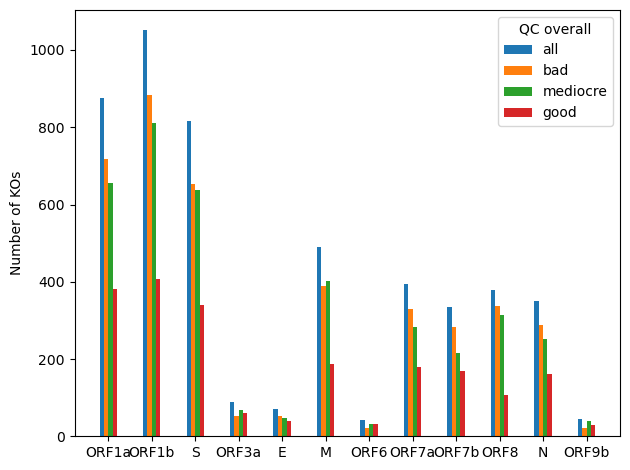

In [12]:
fig, ax = plt.subplots(tight_layout=True)
cutoffs = ['all','bad','mediocre','good']
for cutoff,w in zip(cutoffs, np.arange(0,len(cutoffs)*0.1,0.1)):
    genes = []
    kos = []
    lengths = []
    filt = df[df.QC_overall_status!=cutoff]
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            start = feature.location.start
            end = feature.location.end
            length = len(ref.seq[start:end].translate(to_stop=True))
            ko = filt[name+'_ko']
            genes.append(name)
            kos.append(len(ko[ko=='Yes']))
            lengths.append(length)
    locs = np.arange(0,len(genes))
    ax.bar(locs+w,kos,0.1,label=cutoff)
ax.set_ylabel('Number of KOs')
ax.set_xticks(locs+w/2,genes)
ax.legend(title='QC overall')

## Length

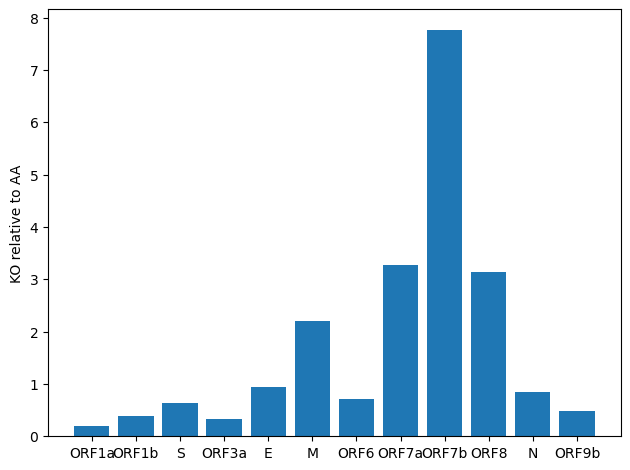

In [13]:
fig, ax = plt.subplots(tight_layout=True)
genes = []
kos = []
lengths = []
for feature in ref.features:
    if feature.type == "CDS":
        name = feature.qualifiers['gene'][0]
        start = feature.location.start
        end = feature.location.end
        length = len(ref.seq[start:end].translate(to_stop=True))
        ko = df[name+'_ko']
        genes.append(name)
        kos.append(len(ko[ko=='Yes']))
        lengths.append(length)
heights = np.asarray(kos)/np.asarray(lengths)
ax.bar(genes,heights)
ax.set_ylabel('KO relative to AA')
fig.savefig('figs/ko_normGeneLength.pdf',dpi=300,bbox_inches='tight')

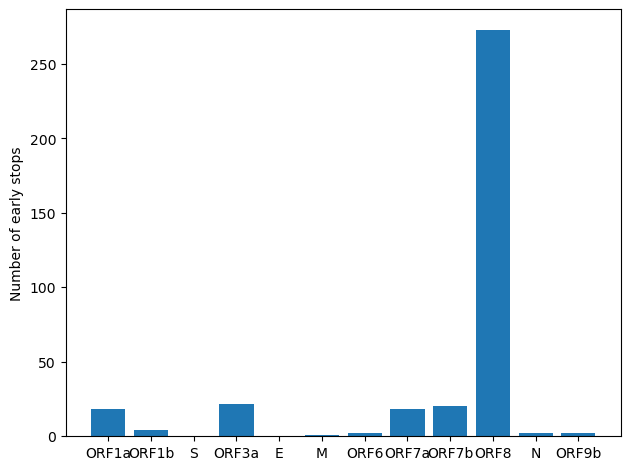

In [17]:
fig, ax = plt.subplots(tight_layout=True)
genes = []
kos = []
lengths = []
for feature in ref.features:
    if feature.type == "CDS":
        name = feature.qualifiers['gene'][0]
        start = feature.location.start
        end = feature.location.end
        length = len(ref.seq[start:end].translate(to_stop=True))
        ko = df[name+'_koType']
        genes.append(name)
        kos.append(len(ko[ko=='earlyStop']))
heights = np.asarray(kos)
ax.bar(genes,heights)
ax.set_ylabel('Number of early stops')
fig.savefig('figs/ko_earlystop.pdf',dpi=300,bbox_inches='tight')

ValueError: operands could not be broadcast together with shapes (12,) (2990,) 

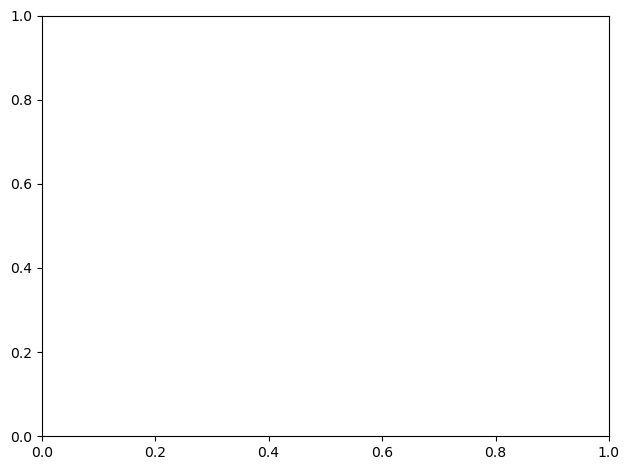

In [15]:
fig, ax = plt.subplots(tight_layout=True)
genes = []
kos = []
lengths = []
for feature in ref.features:
    if feature.type == "CDS":
        name = feature.qualifiers['gene'][0]
        start = feature.location.start
        end = feature.location.end
        length = len(ref.seq[start:end].translate(to_stop=True))
        ko = df[name+'_ko']
        genes.append(name)
        kos.append(len(ko[ko=='Yes']))
heights = np.asarray(kos)
ax.bar(genes,heights)
ax.set_ylabel('KO relative to AA')
fig.savefig('figs/ko_normGeneLength.pdf',dpi=300,bbox_inches='tight')

## Clade

In [63]:
clades = df.Nextstrain_clade.unique()

In [64]:
len(clades)

24

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_62952/3080185678.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row,col].set_xticklabels(genes,rotation=90)
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_62952/3080185678.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row,col].set_xticklabels(genes,rotation=90)
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_62952/3080185678.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row,col].set_xticklabels(genes,rotation=90)
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_62952/3080185678.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row,col].set_xticklabels(genes,rotation=90)
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_62952/3080185678.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row,col].

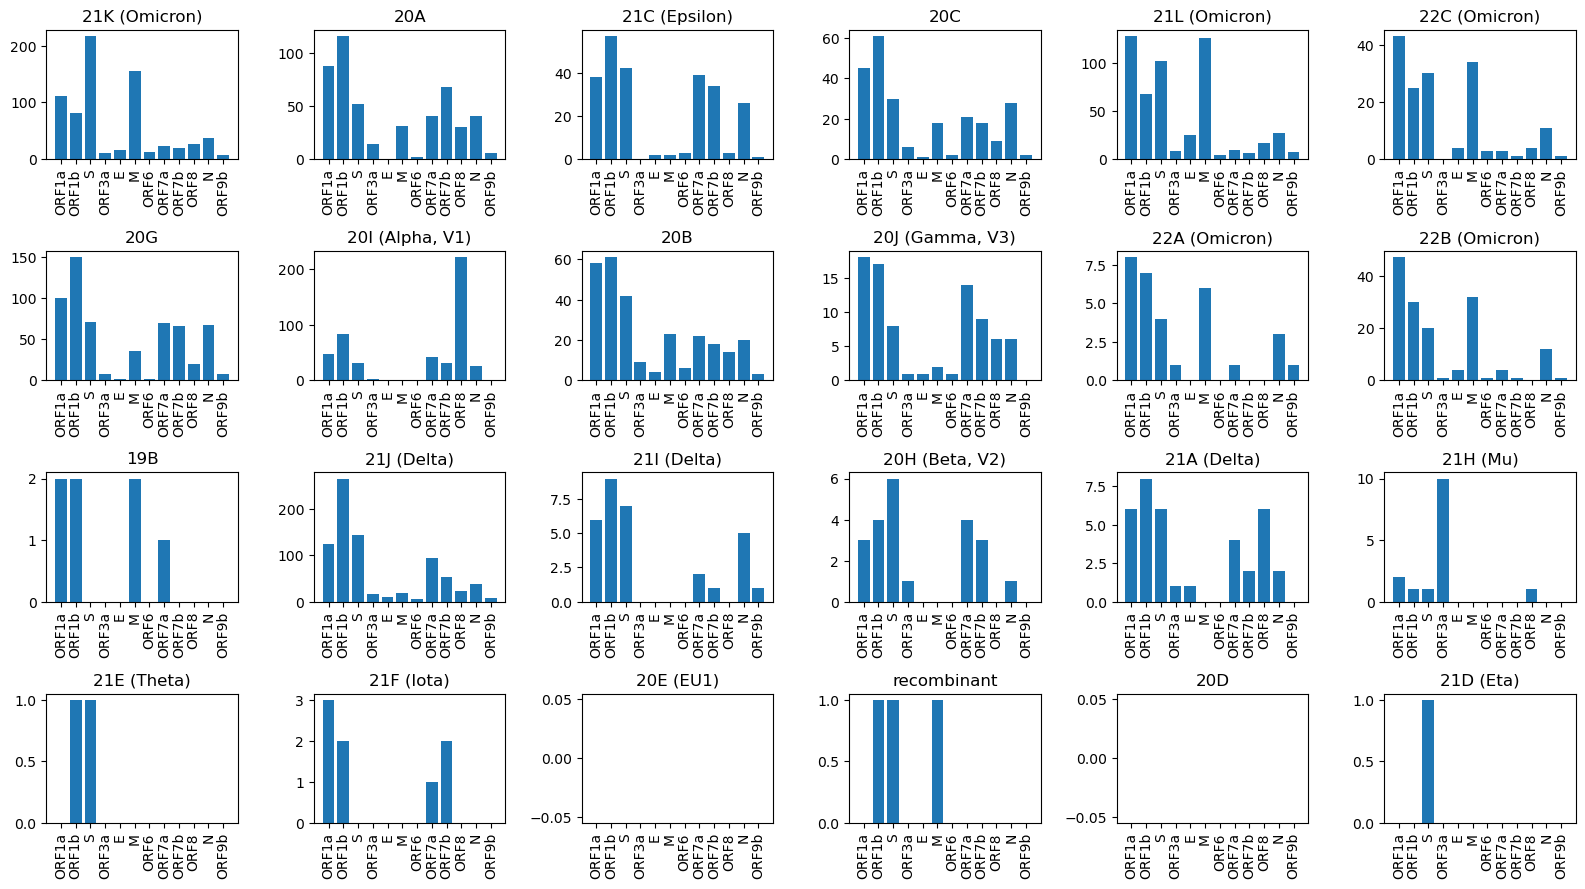

In [73]:
fig,ax=plt.subplots(nrows=4,ncols=6,figsize=(16,9),tight_layout=True)
for i,clade in enumerate(clades):
    col = i % 6
    row = int(np.floor(i/6))
    filt = df[df.Nextstrain_clade==clade]
    genes = []
    kos = []
    for feature in ref.features:
        if feature.type == "CDS":
            name = feature.qualifiers['gene'][0]
            ko = filt[name+'_ko']
            genes.append(name)
            kos.append(len(ko[ko=='Yes']))
    ax[row,col].bar(genes,kos)
    ax[row,col].set_title(clade)
    ax[row,col].set_xticklabels(genes,rotation=90)
fig.savefig('figs/ko_clade.pdf',dpi=300,bbox_inches='tight')
    
    